# Analyzing time series and images

This chapter ties together the skills gained so far through examining time series data and images.
This involves customizing plots of stock data, generating histograms of image pixel intensities, and enhancing image contrast through histogram equalization.

In [1]:
from IPython.display import HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="darkgrid", color_codes=True)

## Visualizing time series

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Visualizing_time_series.mp4" type="video/mp4">
</video>

In [3]:
stocks_file = '../_datasets/stocks.csv'
stocks = pd.read_csv(stocks_file, parse_dates=True, index_col='Date')
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [4]:
aapl = stocks.loc[:,'AAPL']
ibm  = stocks.loc[:,'IBM']
csco = stocks.loc[:,'CSCO']
msft = stocks.loc[:,'MSFT']

C:\Users\mgatt\DataScience\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


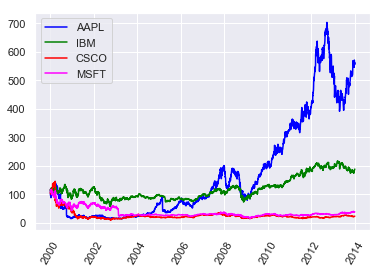

In [5]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

### Multiple time series slices (1)
You can easily slice subsets corresponding to different time intervals from a time series. In particular, you can use strings like `'2001:2005'`, `'2011-03:2011-12'`, or `'2010-04-19:2010-04-30'` to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

- Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels (and other pandas Series & DataFrames by labels), the slice includes the right-most portion of the slice. That is, extracting `my_time_series['1990':'1995']` extracts data from `my_time_series` corresponding to `1990`, `1991`, `1992`, `1993`, `1994`, and `1995` inclusive.
- You can use partial strings or datetime objects for indexing and slicing from time series.

For this exercise, you will use time series slicing to plot the time series `aapl` over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×1 grid of subplots

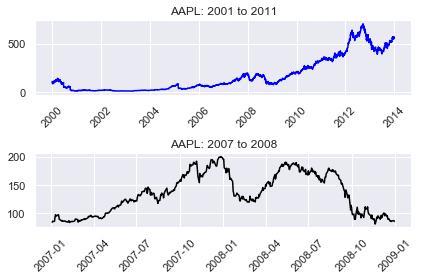

In [6]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

### Multiple time series slices (2)
In this exercise, you will use the same time series `aapl` from the previous exercise and plot tighter views of the data.

- Partial string indexing works without slicing as well. For instance, using `my_time_series['1995']`, `my_time_series['1999-05']`, and `my_time_series['2000-11-04']` respectively extracts views of the time series `my_time_series` corresponding to the entire year `1995`, the entire month `May 1999`, and the entire `day November 4, 2000`.

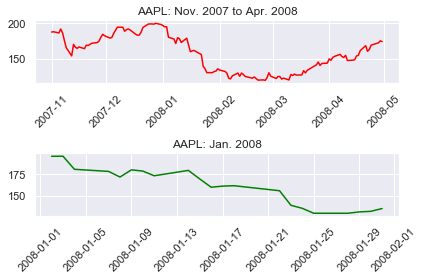

In [7]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view, color='red')

# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: Jan. 2008')
plt.plot(view, color='green')

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

### Plotting an inset view
Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly using `plt.axes()`. In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).

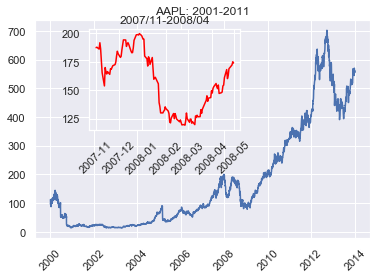

In [8]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes((0.25, 0.5, 0.35, 0.35))

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

## Time series with moving windows
### Moving windows & time series
- Moving window calculations
    - Averages
    - Medians
- Standard deviations
- Extracts information on longer time scales
- See Pandas courses on how to compute

### Plotting moving averages
In this exercise, you will plot pre-computed moving averages of `AAPL` stock prices in distinct subplots.

- The time series `aapl` is overlayed in black in each subplot for comparison.
- The time series `mean_30`, `mean_75`, `mean_125`, and `mean_250` have been computed for you (containing the windowed averages of the series `aapl` computed over windows of width 30 days, 75 days, 125 days, and 250 days respectively).

In [9]:
mean_30 = aapl.rolling(30).mean()
mean_75 = aapl.rolling(75).mean()
mean_125 = aapl.rolling(125).mean()
mean_250 = aapl.rolling(250).mean()

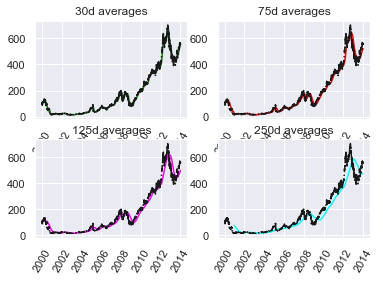

In [10]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2, 2, 1)
plt.plot(mean_30, color='green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2, 2, 2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

### Plotting moving standard deviations
Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

- The time series `aapl` is not plotted in this case; it is of a different length scale than the standard deviations.
- The time series `std_30`, `std_75`, `stdn_125`, & `std_250` have been computed for you (containing the windowed standard deviations of the series `aapl` computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

In [11]:
std_30  = aapl.rolling(30).std()
std_75  = aapl.rolling(75).std()
std_125 = aapl.rolling(125).std()
std_250 = aapl.rolling(250).std()

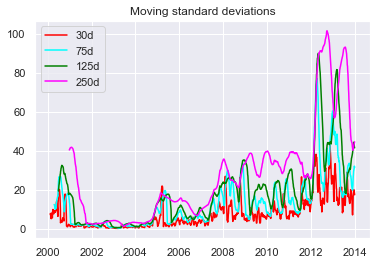

In [12]:
# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')
# Plot std_250 in magenta
plt.plot(std_250, color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

What length is the moving window that most consistently produces the greatest variance (standard deviation) in the AAPL stock price over the time interval shown?

Wider moving windows admit greater variability!

## Histogram equalization in images
### Extracting a histogram from a grayscale image
For grayscale images, various image processing algorithms use an *image histogram*. Recall that an image is a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load [an unequalized low contrast image of Hawkes Bay, New Zealand][1] (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.

[1]:https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg

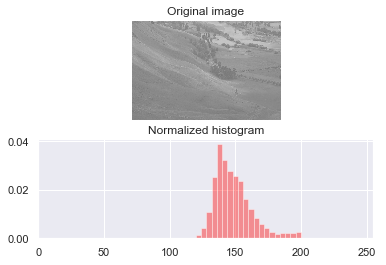

In [13]:
# Load the image into an array: image
image = plt.imread('_Docs/Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), density=True, color='red', alpha=0.4)

# Display the plot
plt.show()

Image histograms are an important component of many image processing algorithms.

### Cumulative Distribution Function from an image histogram
A histogram of a continuous random variable is sometimes called a *[Probability Distribution Function (or PDF)][1]*. The area under a PDF (a definite integral) is called a *[Cumulative Distribution Function (or CDF)][2]*. **The CDF quantifies the probability of observing certain pixel intensities**.

Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the [grayscale image of Hawkes Bay, New Zealand][3] (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, [CC BY 2.0][4]). This time, the 2D array image will be pre-loaded and pre-flattened into the 1D array pixels for you.

- The histogram option cumulative=True permits viewing the CDF instead of the PDF.
- Notice that plt.grid('off') switches off distracting grid lines.
- The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

[1]: https://en.wikipedia.org/wiki/Probability_distribution_function
[2]: https://en.wikipedia.org/wiki/Cumulative_distribution_function
[3]: https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg
[4]: http://creativecommons.org/licenses/by/2.0

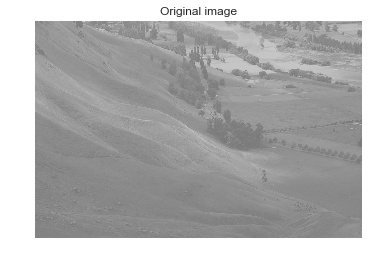

In [14]:
# Load the image into an array: image
image = plt.imread('_Docs/Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

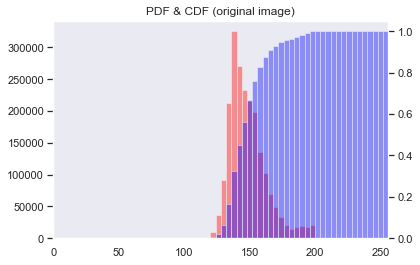

In [15]:
# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False, color='red', alpha=0.4)
plt.grid(False)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256), density=True, cumulative=True, color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid(False)
plt.title('PDF & CDF (original image)')
plt.show()

Notice that the histogram is **not well centered over the range of possible pixel intensies**. The CDF rises sharply near the middle (that relates to the overall grayness of the image).

### Equalizing an image histogram
[*Histogram equalization*][1] is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the [grayscale image of Hawkes Bay, New Zealand][3] (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, [CC BY 2.0][4]). Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its PDF and CDF.

- The arrays `image` and `pixels` are extracted for you in advance.
- The CDF of the original image is computed using `plt.hist()`.
- Notice an array `new_pixels` is created for you that interpolates new pixel values using the original image CDF.

[1]:https://en.wikipedia.org/wiki/Histogram_equalization
[3]: https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg
[4]: http://creativecommons.org/licenses/by/2.0

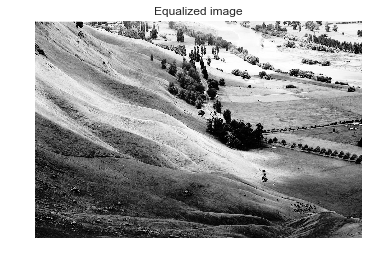

In [16]:
# Load the image into an array: image
image = plt.imread('_Docs/Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape).astype(np.uint8)

# Display the new image with 'gray' color map
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')
plt.show()

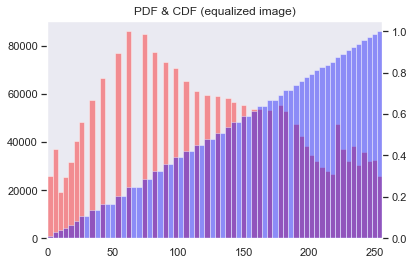

In [17]:
# Generate a histogram of the new pixels
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False, color='red', alpha=0.4)
plt.grid(False)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid(False)

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256), cumulative=True, density=True, color='blue', alpha=0.4)
plt.show()

Histogram equalization can help make an image sharper.

### Extracting histograms from a color image
This exercise resembles the last in that you will plot histograms from an image. This time, you will use a [color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory][1]. The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays `red`, `green`, and `blue` respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

[1]: http://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg

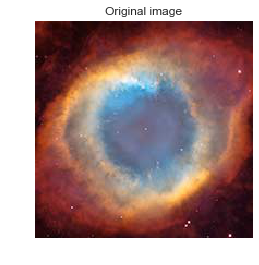

In [18]:
# Load the image into an array: image
image = plt.imread('_Docs/hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Display the plot
plt.show()

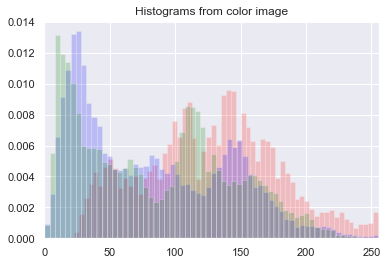

In [19]:
# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2)

# Display the plot
plt.show()

### Extracting bivariate histograms from a color image
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

For this final exercise, you will use the same [color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory][1]. The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional arrays `red_pixels`, `green_pixels`, & `blue_pixels` respectively.

[1]: http://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg

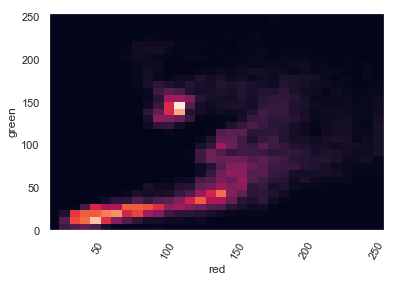

In [20]:
# Load the image into an array: image
image = plt.imread('_Docs/hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.grid(False) 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels,green_pixels, bins=(32,32))

# Display the plot
plt.show()

In [21]:
# Generate a 2-D histogram of the green and blue pixels
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels,blue_pixels, bins=(32,32))

Display the plot
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-316d1943b8fd>, line 8)

In [ ]:
# Generate a 2-D histogram of the blue and red pixels
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels,red_pixels, bins=(32,32))

# Display the plot
plt.show()